0. Proportion of tweets and retweets by country type
1. Check correlation between ethnicity and country (type) before using
2. attention vs sentiment
3. Randomized baseline model
  - In the randomized world, for each author we randomly choose another author with the same gender and ethnicity. This allows us to isolate the effect of location.
  - due to the limitation of ethnicity identification, we do a RBM while controlling for only gender

In [1]:
from google.colab import drive
drive.mount('/content/drive')
dir_path = '/content/drive/MyDrive/CSS_project/data/'
img_path = '/content/drive/MyDrive/CSS_project/data/steven_img/'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(dir_path+'all_tweets_and_retweets_1127.csv', index_col=0)

In [4]:
df_tweet  = df[~df.is_retweet]
df_retweet = df[df.is_retweet]

In [5]:
N_tweets = len(df_tweet)
N_retweets = len(df_retweet)
N_tweets, N_retweets

(309205, 758460)

In [6]:
len(set(df.author_id))

680687

0. Tweets and retweets proportion

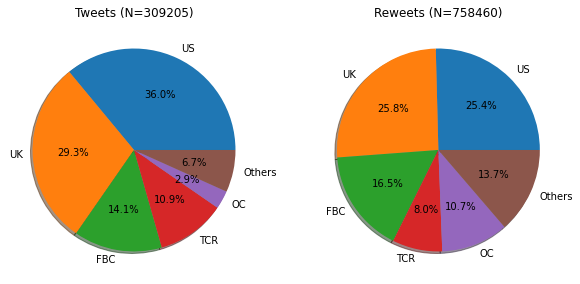

In [32]:
temp_type=['US','UK','FBC','TCR','OC','Others']
temp = df[['type','is_retweet']].value_counts().reset_index().rename(columns={0:'count'}).set_index('type')
temp_tweet, temp_retweet = temp[~temp.is_retweet], temp[temp.is_retweet]
fig, ax = plt.subplots(1,2, figsize=(10,5))
_ = ax[0].pie(temp_tweet.loc[temp_type]['count'], labels=temp_type, shadow=True, autopct='%1.1f%%')
_ = ax[1].pie(temp_retweet.loc[temp_type]['count'], labels=temp_type, shadow=True, autopct='%1.1f%%')
_ = ax[0].set_title(f'Tweets (N={N_tweets})')
_ = ax[1].set_title(f'Reweets (N={N_retweets})')
# fig.savefig(img_path+'tweets_and_retweets_proportion.png', bbox_inches='tight')

# 1. Correlatino between ethnicity and location

In [55]:
from scipy.stats.contingency import association

Cramer's V is low --> weak correlation

In [69]:
association(df[['ethnicity_group','type']].value_counts().unstack().fillna(0).astype(int), method="cramer", correction=True)

0.1695032664745165

In [74]:
temp_t = df[~df.is_retweet][['ethnicity_group','type']].value_counts().unstack().fillna(0).astype(int).transpose() # tweets
temp_rt = df[df.is_retweet][['ethnicity_group','type']].value_counts().unstack().fillna(0).astype(int).transpose() # retweets

To show the ethnicity distribution in each country group we normalize before plotting the heatmap (so that each row sums up to 1)

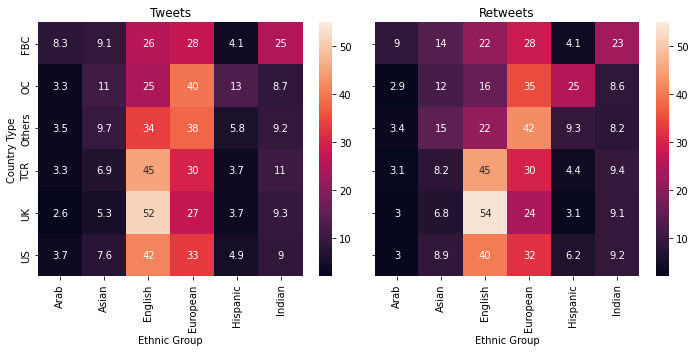

In [116]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
_ = sns.heatmap(temp_t.div(temp_t.sum(axis=1), axis=0)*100, annot=True, ax=ax[0], vmin=2, vmax=55)
_ = sns.heatmap(temp_rt.div(temp_rt.sum(axis=1), axis=0)*100, annot=True, ax=ax[1], vmin=2, vmax=55)
for i in [0,1]:
  ax[i].set_xlabel('Ethnic Group')
ax[0].set_ylabel('Country Type')
ax[1].set_ylabel('')
ax[0].set_title('Tweets')
ax[1].set_title('Retweets')
fig.tight_layout()
# fig.savefig(img_path+'ethnicity_in_each_country_type.png', bbox_inches='tight')

how about gender vs ethnicity?

In [83]:
temp = df[['ethnicity_group','gender']].value_counts().unstack().fillna(0).astype(int)
association(temp, method="cramer", correction=True)

0.0604458096149148

# 2. Attention vs sentiment

For each sentiment, plot tweet public metrics against country type

This isn't really useful considering the like count doesn't differ by much and there are confounders such like difference in the tendency to like a tweet in different countries...

In [138]:
# # plot multiple metrics
# metrics = ['like_count','retweet_count','quote_count']
# fig, ax = plt.subplots(len(metrics),6, sharey=True, figsize=(20,10))
# for m_idx, m in enumerate(metrics):
#   i = 0
#   for emotion, groupdf in df_tweet.groupby(['emotion']):
#     this_ax = ax[m_idx][i]
#     logscale=True
#     if logscale:
#       this_ax.set_yscale('log')
#       groupdf = groupdf.replace({0:1}) # for plotting log scale
#     temp = df_tweet.groupby(['emotion']).get_group(emotion).sort_values('type')
#     # temp.boxplot(column=m, by='type', ax=this_ax)
#     # sns.scatterplot(data=temp, y=m, x='type', ax=this_ax)
#     # sns.violinplot(data=temp, y=m, x='type', ax=this_ax)
#     sns.boxplot(data=temp, y=m, x='type', ax=this_ax)
#     # this_Ax.scatter(data=temp, y=m, x='type')
#     this_ax.set_title(emotion.title())
#     # this_ax.set_ylim(1,1e7)
#     this_ax.set_xlabel('')
#     this_ax.set_ylabel('')
#     i += 1   
#   ax[m_idx][0].set_ylabel(m.replace('_',' ').title())
# plt.tight_layout()

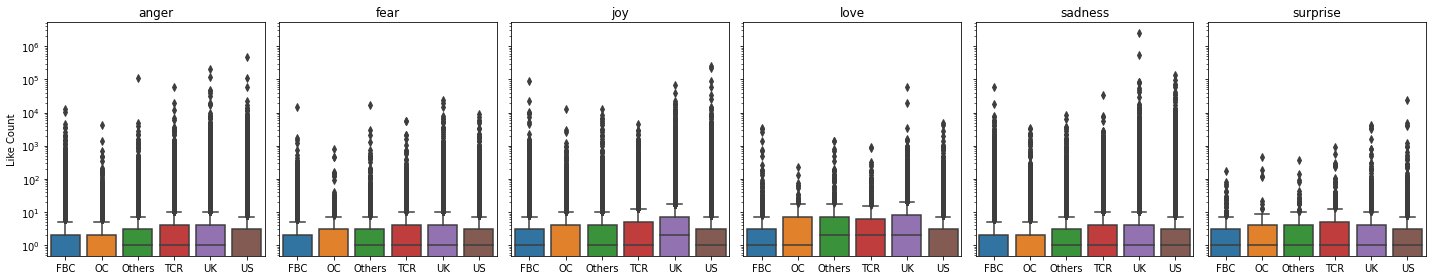

In [180]:
fig, ax = plt.subplots(1,6, sharey=True, figsize=(20,4))
i = 0
for emotion, groupdf in df_tweet.groupby(['emotion']):
  logscale=True
  if logscale:
    ax[i].set_yscale('log')
    groupdf = groupdf.replace({0:1}) # for plotting log scale
  temp = df_tweet.groupby(['emotion']).get_group(emotion).sort_values('type')
  sns.boxplot(data=temp, y='like_count', x='type', ax=ax[i])
  ax[i].set_title(emotion)
  # ax[i].set_ylim(1,1e7)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  i += 1   
ax[0].set_ylabel('Like Count')
plt.tight_layout()
# fig.savefig(img_path+'sentiment_vs_likecount_by_country.png')

In [174]:
ethnic_groups = sorted(list(set(df.ethnicity_group)))

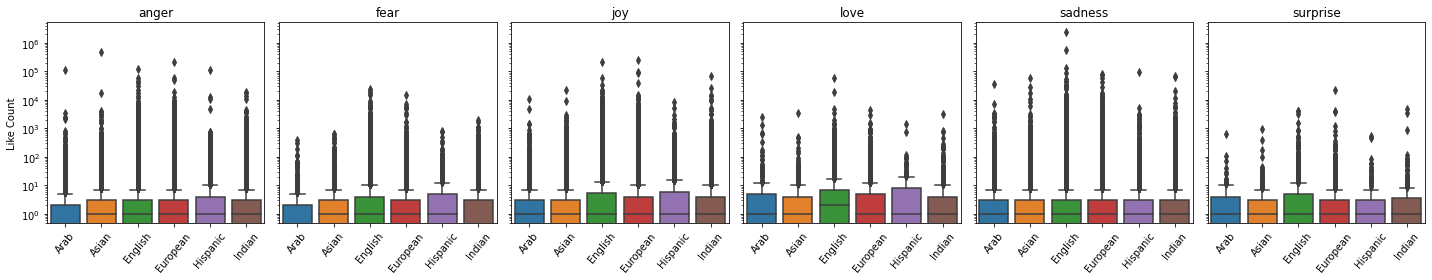

In [179]:
fig, ax = plt.subplots(1,6, sharey=True, figsize=(20,4))
i = 0
for emotion, groupdf in df_tweet.groupby(['emotion']):
  logscale=True
  if logscale:
    ax[i].set_yscale('log')
    groupdf = groupdf.replace({0:1}) # for plotting log scale
  temp = df_tweet.groupby(['emotion']).get_group(emotion).sort_values('ethnicity_group')
  sns.boxplot(data=temp, y='like_count', x='ethnicity_group', ax=ax[i])
  ax[i].set_title(emotion)
  # ax[i].set_ylim(1,1e7)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].set_xticklabels(ethnic_groups, rotation = 50)
  i += 1   
ax[0].set_ylabel('Like Count')
plt.tight_layout()
# fig.savefig(img_path+'sentiment_vs_likecount_by_ethnicity.png')

In [45]:
# for t,g in df_tweet.groupby('type'):
#   print(t, len(g.groupby('country').size()))

# 3. RBM
In the randomized world, for each author we randomly choose another author with the same gender and ethnicity. This allows us to isolate the effect of location.

In [9]:
df_tweet.head(2)

,tweet_id,country,type,emotion,is_retweet,author_id,gender,ethnicity,ethnicity_group,retweet_count,reply_count,like_count,quote_count
0,1572368735440183297,IN,FBC,sadness,False,1566773297798434818,M,mea,Arab,0,0,1,0
1,1572368364311564288,AU,TCR,joy,False,1473605424813203458,M,eng,English,0,0,0,0


In [7]:
types = ['FBC','UK','TCR','US','OC','Others']
emotions = ['sadness', 'joy', 'anger', 'fear', 'love', 'surprise']

In [8]:
np.random.seed(0)
def permute_location(df, fix=['gender','ethnicity']): # fix: what we want to control for
  if set(fix)=={'gender','ethnicity'}:
    control_groups = df.groupby(['gender','ethnicity_group']) # groups defined by gender & ethnic group
  elif fix==['gender']:
    control_groups = df.groupby('gender') # groups defined by gender only
  else:
    print('Invalid variables to control for')
    return
  temp = [] # dataframes to return
  for group_name, df_group in control_groups:
    idx = list(df_group.index) # index of this dataframe
    np.random.shuffle(idx) # shuffle the index within this group
    df_group['country'] = list(df_group['country'].loc[idx]) # permute country
    df_group['type'] = list(df_group['type'].loc[idx]) # permute country type
    temp.append(df_group)
  return pd.concat(temp)

In [9]:
df_cf = permute_location(df_tweet, fix=['gender','ethnicity']) # counterfactual

In [116]:
# # check if the permutation is correct
# for (g_og, df_og), (g_cf, df_cf) in zip(df.groupby(['gender','ethnicity_group']), df_cf.groupby(['gender','ethnicity_group'])):
#   print(g_og, g_cf)
#   display(df_og['type'].value_counts())
#   display(df_cf['type'].value_counts())
#   display(df_og[:3])
#   display(df_cf[:3])

In [10]:
def get_emotion_ratio_by_type(df):
  return pd.DataFrame(df.groupby('type')['emotion'].value_counts(normalize=True)).mul(100).rename(columns={'emotion':'percent'}).reset_index()

In [11]:
# # this is without controlling for anything
# temp_og = get_emotion_ratio_by_type(df)
# temp_cf = get_emotion_ratio_by_type(df_cf)
# fig, ax = plt.subplots(1,2, figsize=(20,5))
# sns.barplot(data=temp_og, x='emotion',y='percent',hue='type', ax=ax[0]).set(title='Real data')
# sns.barplot(data=temp_cf, x='emotion',y='percent',hue='type', ax=ax[1]).set(title='Counterfactual (permute by type)')
# ax[0].set_ylim(0,80)
# ax[1].set_ylim(0,80)
# fig.suptitle('Sentiment Percentage By Country Type')

Easier to read from the difference of percentage ... also compute the confidence interval along the way

In [12]:
def randomized_baseline_model(df=df_tweet, n_trial=50, conf=0.95, fix=['gender','ethnicity']):
  perc_diff_dict = {(t,e):[] for t in types for e in emotions} # value= list of difference in percentage of tweet (len=n_trial)
  for j in range(n_trial):
    df_cf = permute_location(df, fix=fix) # counterfactual
    temp_og = get_emotion_ratio_by_type(df)
    temp_cf = get_emotion_ratio_by_type(df_cf)
    temp_difference = temp_og.set_index(['type','emotion']) - temp_cf.set_index(['type','emotion'])
    for (t,e), d in temp_difference.iterrows():
      perc_diff_dict[(t,e)].append(d.percent) # add the difference in percentage to dict
  results = pd.DataFrame.from_dict({k:{'difference':v} for k,v in perc_diff_dict.items()}, orient='index') # convert to dataframe
  l_, u_ = np.floor(50-100*conf/2), np.ceil(50+100*conf/2)
  results['CI_l'] = results.difference.apply(lambda d: np.percentile(d,l_))
  results['CI_u'] = results.difference.apply(lambda d: np.percentile(d,u_))
  results['median'] = results.difference.apply(lambda d: np.percentile(d,50))
  return results

In [13]:
def plot_results(results, figsize=(10,5), ax=None):
  df_plot = results.reset_index().rename(columns={'level_0':'type','level_1':'emotion'})
  # neg/pos difference of the end of CI from median
  df_plot['n_diff'] = df_plot['median'] - df_plot.CI_l
  df_plot['p_diff'] = df_plot.CI_u - df_plot['median']
  if ax is None:
    _ , ax = plt.subplots(1, figsize=figsize)
  ax = sns.barplot(data=df_plot, x='emotion',y='median',hue='type', ax=ax)
  ax.legend(shadow=True)
  for (hue, df_hue), dogde_dist in zip(df_plot.groupby('type'), np.linspace(-0.4, 0.4, 2 * len(emotions) + 1)[1::2]):
    bars = ax.errorbar(data=df_hue, x='emotion', y='median', ls='', lw=3, color='black')
    xys = bars.lines[0].get_xydata()
    bars.remove()
    ax.errorbar(data=df_hue, x=xys[:, 0]+dogde_dist, y='median', yerr=np.array(df_hue[['n_diff','p_diff']]).T, ls='', lw=2, color='black')
    # ax.scatter(data=df_hue, x=xys[:, 0]+dogde_dist, y='median')
  ax.set_ylabel('Difference in sentiment percentage\n(real - randomized)')
  ax.plot([-0.5,5.5],[0,0], c='black') # y=0
  return ax

In [14]:
results = randomized_baseline_model(df_tweet, n_trial=100, conf=0.95)
results_rt = randomized_baseline_model(df_retweet, n_trial=100, conf=0.95)

In [16]:
# results.to_csv(dir_path+'rbm_result_tweet.csv')
# results_rt.to_csv(dir_path+'rbm_result_retweet.csv')

In [62]:
# fig, ax = plt.subplots(1, figsize=(10,5))
# plot_results(results, ax=ax)
# ax.set_title('Percentage Difference in Tweet Emotion By Country Group')
# # fig.savefig(img_path+'rbm_tweets.png')

In [63]:
# fig, ax = plt.subplots(1, figsize=(10,5))
# plot_results(results_rt, ax=ax)
# ax.set_title('Percentage Difference in Retweet Emotion By Country Group')
# # fig.savefig(img_path+'rbm_tweets.png')

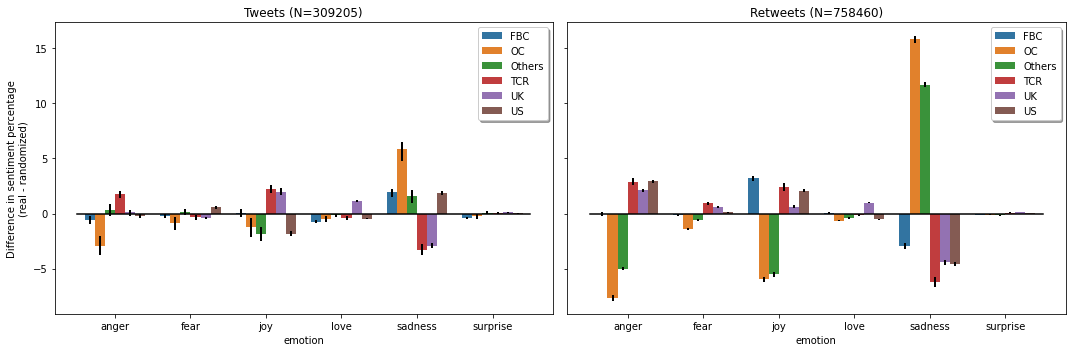

In [185]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0] = plot_results(results, ax=ax[0])
ax[1] = plot_results(results_rt, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_title(f'Tweets (N={N_tweets})')
ax[1].set_title(f'Retweets (N={N_retweets})')
fig.tight_layout()
# # fig.suptitle('Randomized Baseline Model')
# fig.savefig(img_path+'rbm_controlling_for_gender_ethnicity.png')

Observations:
- The effect of retweets is a lot more pronounced compared to that of tweets
- FBC: tweets are sadder in the counterfactual world, where as if the retweets are less sad (opposite behavior). This means that people from FBC tend to send more sad tweets, they are less likely to retweet sad tweets.
- OC and Others: percentages for retweets in anger and joy are a lot lower, while sadness is significantly higher
- US, UK, TCR: anger and sadness are a lot lower for retweets compared to tweets.

How about only controlling for gender?

In [17]:
results2 = randomized_baseline_model(df_tweet, n_trial=100, conf=0.95, fix=['gender'])
results_rt2 = randomized_baseline_model(df_retweet, n_trial=100, conf=0.95, fix=['gender'])

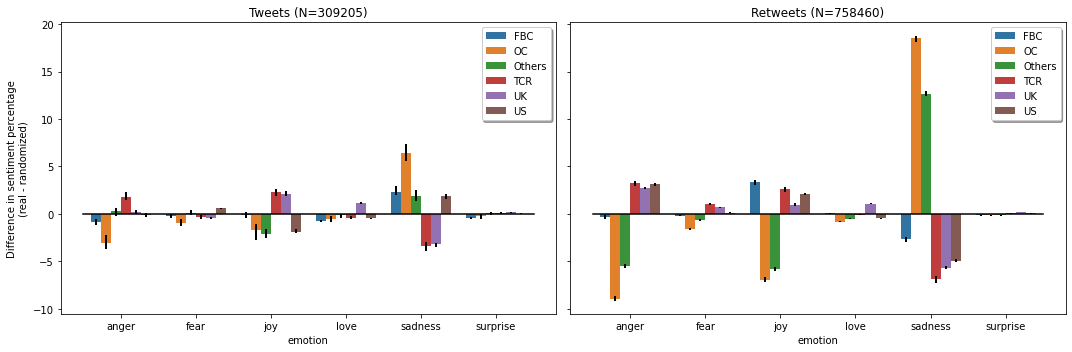

In [187]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0] = plot_results(results2, ax=ax[0])
ax[1] = plot_results(results_rt2, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_title(f'Tweets (N={N_tweets})')
ax[1].set_title(f'Retweets (N={N_retweets})')
fig.tight_layout()
# fig.savefig(img_path+'rbm_controlling_for_gender.png')

# RBM for US and UK

Let's see what role ethnicity plays in the US and the UK while controlling for gender

In [18]:
ethnic_groups = ['English', 'European','Indian','Asian','Hispanic','Arab']

In [27]:
local_tweets = {c:df_tweet[df_tweet['type']==c] for c in ['US','UK','TCR']}
local_retweets = {c:df_retweet[df_retweet['type']==c] for c in ['US','UK','TCR']}

In [30]:
# eth_perc = pd.DataFrame({
#     'US Tweets':local_tweets['US'].ethnicity_group.value_counts(normalize=True),
#     'UK Tweets':local_tweets['UK'].ethnicity_group.value_counts(normalize=True),
#     'US Retweets':local_retweets['US'].ethnicity_group.value_counts(normalize=True),
#     'UK Retweets':local_retweets['UK'].ethnicity_group.value_counts(normalize=True)
#     })*100
# eth_perc = eth_perc.transpose().reset_index().rename(columns={'index':'Category'})    
# eth_perc

In [31]:
# # this overlaps with the ethnic group heatmap
# ax = eth_perc.plot(x='Category', kind='bar', stacked=True,
#         title='Ethnicity Distribution of Tweets and Retweets in US and UK', figsize=(6,6) )
# plt.xticks(rotation=0)
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f} %'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')
# plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, shadow=True)
# # plt.savefig(img_path+'us_uk_eth_perc.png', dpi=600, pad_inches=0.1, bbox_inches='tight')

In [21]:
def permute_ethnicity(df): # for tweets or retweets within US or UK, controlling for gender
  control_groups = df.groupby('gender') # groups defined by gender only
  temp = [] # dataframes to return
  for group_name, df_group in control_groups:
    idx = list(df_group.index) # index of this dataframe
    np.random.shuffle(idx) # shuffle the index within this group
    df_group['ethnicity_group'] = list(df_group['ethnicity_group'].loc[idx]) # permute ethnic group
    temp.append(df_group)
  return pd.concat(temp)

In [22]:
def get_emotion_ratio_by_ethnic_group(df):
  return pd.DataFrame(df.groupby('ethnicity_group')['emotion'].value_counts(normalize=True)).mul(100).rename(columns={'emotion':'percent'}).reset_index()

In [23]:
def RBM2(df, n_trial=50, conf=0.95):
  perc_diff_dict = {(g,e):[] for g in ethnic_groups for e in emotions} # value= list of difference in percentage of tweet (len=n_trial)
  for j in range(n_trial):
    df_cf = permute_ethnicity(df) # counterfactual
    temp_og = get_emotion_ratio_by_ethnic_group(df)
    temp_cf = get_emotion_ratio_by_ethnic_group(df_cf)
    temp_difference = temp_og.set_index(['ethnicity_group','emotion']) - temp_cf.set_index(['ethnicity_group','emotion'])
    for (t,e), d in temp_difference.iterrows():
      perc_diff_dict[(t,e)].append(d.percent) # add the difference in percentage to dict
  results = pd.DataFrame.from_dict({k:{'difference':v} for k,v in perc_diff_dict.items()}, orient='index') # convert to dataframe
  l_, u_ = np.floor(50-100*conf/2), np.ceil(50+100*conf/2)
  results['CI_l'] = results.difference.apply(lambda d: np.percentile(d,l_))
  results['CI_u'] = results.difference.apply(lambda d: np.percentile(d,u_))
  results['median'] = results.difference.apply(lambda d: np.percentile(d,50))
  return results

In [44]:
def plot_results2(results, ax):
  df_plot = results.reset_index().rename(columns={'level_0':'ethnicity','level_1':'emotion'})
  # neg/pos difference of the end of CI from median
  df_plot['n_diff'] = df_plot['median'] - df_plot.CI_l
  df_plot['p_diff'] = df_plot.CI_u - df_plot['median']
  ax = sns.barplot(data=df_plot, x='emotion',y='median',hue='ethnicity', ax=ax)
  ax.legend(loc='upper right', shadow=True)
  for (hue, df_hue), dogde_dist in zip(df_plot.groupby('ethnicity'), np.linspace(-0.4, 0.4, 2 * len(emotions) + 1)[1::2]):
    bars = ax.errorbar(data=df_hue, x='emotion', y='median', ls='', lw=3, color='black')
    xys = bars.lines[0].get_xydata()
    bars.remove()
    ax.errorbar(data=df_hue, x=xys[:, 0]+dogde_dist, y='median', yerr=np.array(df_hue[['n_diff','p_diff']]).T, ls='', lw=2, color='black')
  ax.set_ylabel('Difference in sentiment percentage\n(real - randomized)')
  ax.plot([-0.5,5.5],[0,0], c='black') # y=0
  return ax

In [33]:
result_us_t = RBM2(local_tweets['US'], n_trial=100)
result_us_rt = RBM2(local_retweets['US'], n_trial=100)
result_uk_t = RBM2(local_tweets['UK'], n_trial=100)
result_uk_rt = RBM2(local_retweets['UK'], n_trial=100)
result_tcr_t = RBM2(local_tweets['TCR'], n_trial=100)
result_tcr_rt = RBM2(local_retweets['TCR'], n_trial=100)

In [34]:
# result_us_t.to_csv(dir_path+'rbm_result_us_tweet.csv')
# result_us_rt.to_csv(dir_path+'rbm_result_us_retweet.csv')
# result_uk_t.to_csv(dir_path+'rbm_result_uk_tweet.csv')
# result_uk_rt.to_csv(dir_path+'rbm_result_uk_retweet.csv')
# result_tcr_t.to_csv(dir_path+'rbm_result_tcr_tweet.csv')
# result_tcr_rt.to_csv(dir_path+'rbm_result_tcr_retweet.csv')

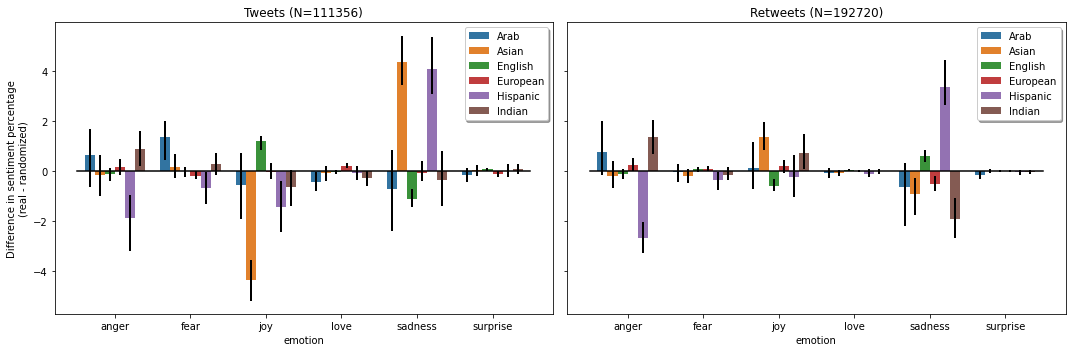

In [188]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0] = plot_results2(result_us_t, ax=ax[0])
ax[1] = plot_results2(result_us_rt, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_title(f"Tweets (N={len(local_tweets['US'])})")
ax[1].set_title(f"Retweets (N={len(local_retweets['US'])})")
fig.tight_layout()
# fig.savefig(img_path+'rbm_us_ethnicity_controlling_for_gender.png')

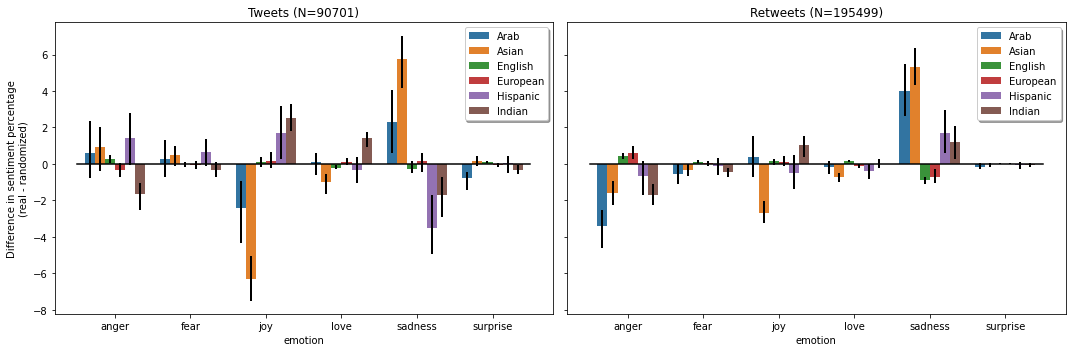

In [194]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0] = plot_results2(result_uk_t, ax=ax[0])
ax[1] = plot_results2(result_uk_rt, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_title(f"Tweets (N={len(local_tweets['UK'])})")
ax[1].set_title(f"Retweets (N={len(local_retweets['UK'])})")
fig.tight_layout()
# fig.savefig(img_path+'rbm_uk_ethnicity_controlling_for_gender.png')

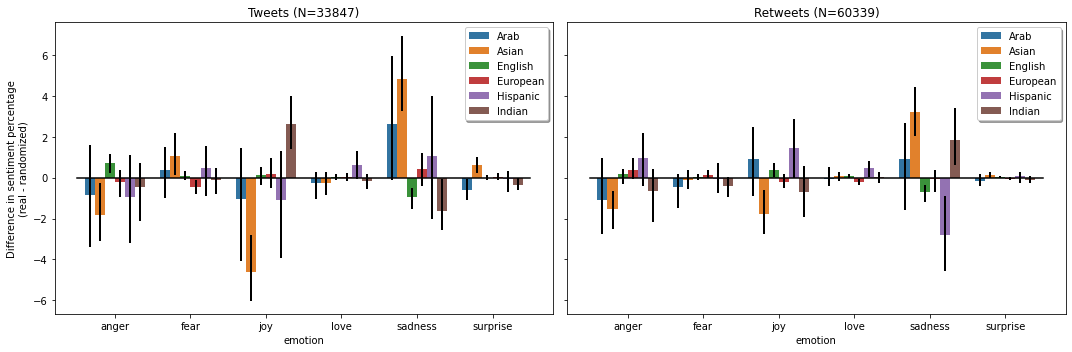

In [46]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0] = plot_results2(result_tcr_t, ax=ax[0])
ax[1] = plot_results2(result_tcr_rt, ax=ax[1])
ax[1].set_ylabel('')
ax[0].set_title(f"Tweets (N={len(local_tweets['TCR'])})")
ax[1].set_title(f"Retweets (N={len(local_retweets['TCR'])})")
fig.tight_layout()
# fig.savefig(img_path+'rbm_tcr_ethnicity_controlling_for_gender.png')

In [50]:
def get_RBM_in_country(country_name):
  df_t, df_rt = df_tweet[df_tweet['country']==country_name], df_retweet[df_retweet['country']==country_name]
  result_t, result_rt = RBM2(df_t, n_trial=100), RBM2(df_rt, n_trial=100)
  fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
  ax[0] = plot_results2(result_t, ax=ax[0])
  ax[1] = plot_results2(result_rt, ax=ax[1])
  ax[1].set_ylabel('')
  ax[0].set_title(f"Tweets (N={len(df_t)})")
  ax[1].set_title(f"Retweets (N={len(df_rt)})")
  fig.tight_layout()
  return fig, ax

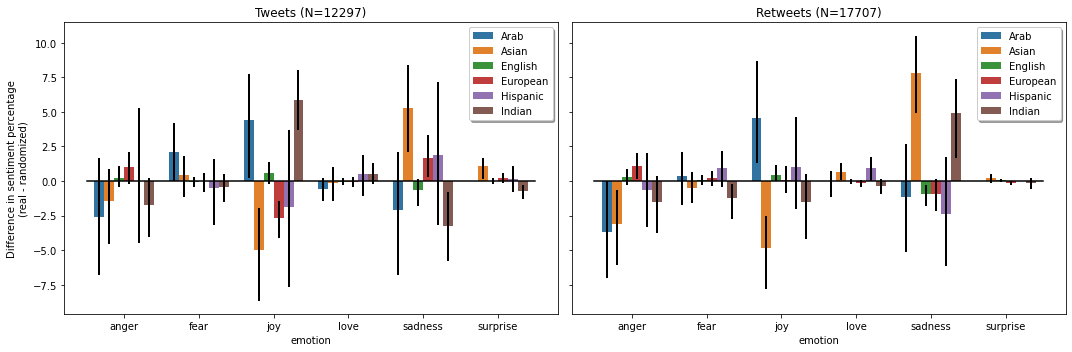

In [52]:
fig, ax = get_RBM_in_country('AU')